# Exercise 2

Calculate Cross Polar Cap Potential of AMGeO maps and Compare to AMPERE total current

Get total current file from [here](http://ampere.jhuapl.edu/products/itot/daily.html)

Once the file is downloaded, you can call `read_amp_Itot_dat` from the `util` python file to read the data into a Pandas Dataframe

NOTE: some values from AMPERE may not have good data, you will want to look out for these for columns with value `9999.0`

Hint 1: you are going to want to compare AMGeO's CPCP to `I total down North [MA]`

Hint 2: in a plot, maybe be helpful to scale CPCP 

In [1]:
# AMGeO setup

# Ignore uunecessary warnings from AMGeO dependencies
import warnings
warnings.filterwarnings('ignore')

from AMGeO.api import AMGeOApi

api = AMGeOApi()

Solar wind data files will be saved to /home/jovyan/.local/share/nasaomnireader

------------IMPORTANT----------------------------
Unable to import spacepy. Will fall back to
using Omni text files, which may have slightly
different data and incomplete metadata
-------------------------------------------------



In [2]:
api.set_output_dir('./amgeo_out')

controller = api.get_controller()

api.get_output_dir()

'/workspaces/Earthcube-Workshop-2022/amgeo_out'

In [3]:
from datetime import date

ds = controller.load(date(2017, 9, 7), 'N')

In [4]:
from util import read_amp_Itot_dat

df_amp = read_amp_Itot_dat('ampere/amp_itot_daily_20170907.dat')

In [5]:
#Calculate cross polar cap potential
epot_da = ds['epot']
cpcp = epot_da.max(dim=('lat','lon'))-epot_da.min(dim=('lat','lon'))
ds['cpcp']=cpcp

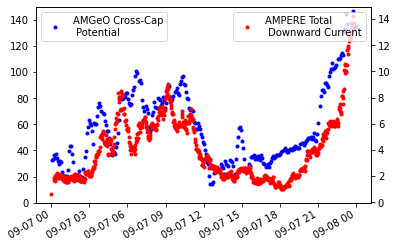

In [6]:
import matplotlib.pyplot as plt
f = plt.figure()
axl = plt.subplot(111)
axr = axl.twinx()
axl.plot(ds['time'],ds['cpcp']/1000,'b.',label='AMGeO Cross-Cap\n Potential')
axl.set_ylim([0,150])

varname = 'I total down North [MA]'
good = df_amp[varname]!=9999.00
axr.plot(df_amp.index[good],-1*df_amp[varname][good],'r.',label='AMPERE Total\n Downward Current')
axl.legend(loc='upper left')
axr.legend(loc='upper right')

#Format the x-axis nicely
f.autofmt_xdate()
